#### Nayyera wasim 21i1651
#### Mohammad Osman  21i123

In [1]:
# libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

c:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# readig data from EnergySector folder
data1 = pd.read_csv('energy_consumption.csv')

In [3]:
data1.head()

,ds,y
0,2012-02-06 00:00:00,4885.7671
1,2012-02-06 00:30:00,4526.6826
2,2012-02-06 01:00:00,4436.0894
3,2012-02-06 01:30:00,4361.2412
4,2012-02-06 02:00:00,4295.2305


In [4]:
data1.describe()

,y
count,193536.000000
mean,5920.546733
std,736.427255
min,3735.725100
25%,5345.995575
50%,5946.776064
75%,6500.084258
max,7789.239798


In [5]:
# columns in the data
data1.columns


Index(['ds', 'y'], dtype='object')

In [6]:
# checking for missing values
data1.isnull().sum()

ds    0
y     0
dtype: int64

In [7]:
# filling missing values with mean
data1.dropna(inplace=True)

In [8]:
# using only 100 rows for training
data2 = data1.head(10000)


In [9]:
data2.head()

,ds,y
0,2012-02-06 00:00:00,4885.7671
1,2012-02-06 00:30:00,4526.6826
2,2012-02-06 01:00:00,4436.0894
3,2012-02-06 01:30:00,4361.2412
4,2012-02-06 02:00:00,4295.2305


## Problem

In [10]:
# standardizing the data 
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(data2[['y']])
# combining the df y with the date column from data2
df = pd.DataFrame(df, columns=['y'])
df['ds'] = data2['ds'].values
df.head()

,y,ds
0,-0.748518,2012-02-06 00:00:00
1,-1.287113,2012-02-06 00:30:00
2,-1.422994,2012-02-06 01:00:00
3,-1.535260,2012-02-06 01:30:00
4,-1.634270,2012-02-06 02:00:00


# Algorithms

In [11]:
# Applying ARIMA model and forecast time series data that shows levels of non-stationarity or seasonal patterns.
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from pandas import DatetimeIndex
# Finding the best p,d,q values
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima

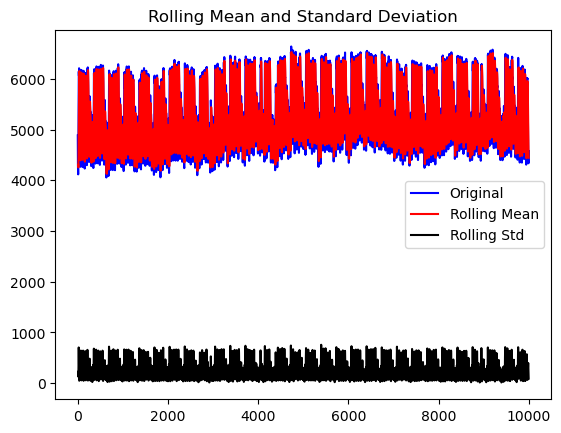

Results of Dickey-Fuller Test:
Test Statistic                -6.232248e+00
p-value                        4.921123e-08
#Lags Used                     3.800000e+01
Number of Observations Used    9.961000e+03
Critical Value (1%)           -3.431007e+00
Critical Value (5%)           -2.861830e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [12]:
# test for stationarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    # Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(data2['y'])

c:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


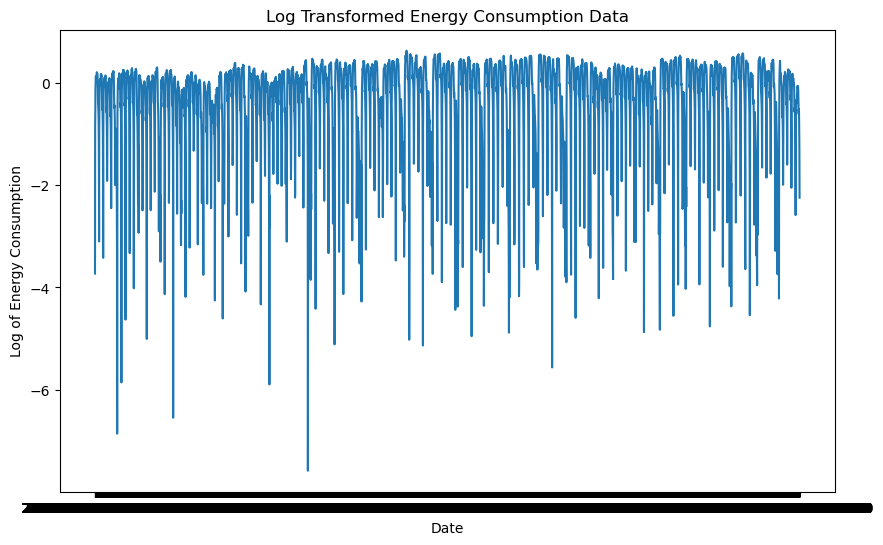

In [13]:

# Create a new DataFrame with the log-transformed sales data
data_log_df = data2
# Drop NaN values
data_log_df.dropna(inplace=True)

# Plot log-transformed data
plt.figure(figsize=(10,6))
plt.plot(data_log_df['ds'], data_log_df['Log_Y'])
plt.title('Log Transformed Energy Consumption Data')
plt.xlabel('Date')
plt.ylabel('Log of Energy Consumption')
plt.show()



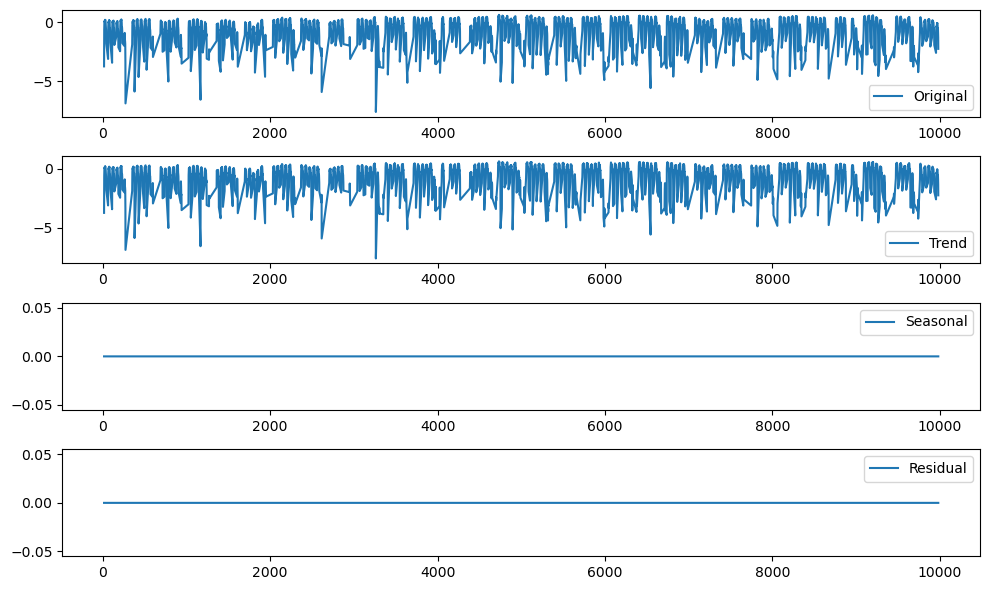

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualize stationary data
decomposition = seasonal_decompose(data_log_df['Log_Y'], model='additive', period=1)

# Plot the decomposed components
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(data_log_df['Log_Y'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# ARIMA

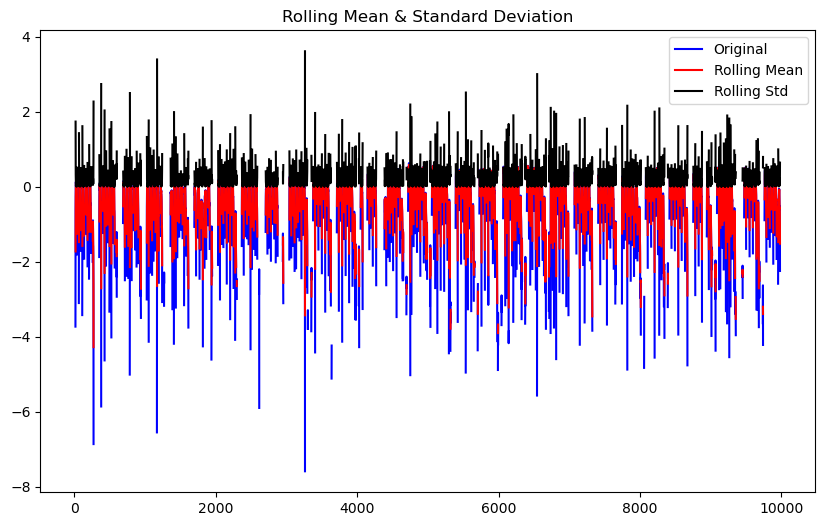

In [15]:
# moving average of the data
rolling_mean = data_log.rolling(window=3).mean()
rolling_std = data_log.rolling(window=3).std()

plt.figure(figsize=(10,6))
plt.plot(data_log, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

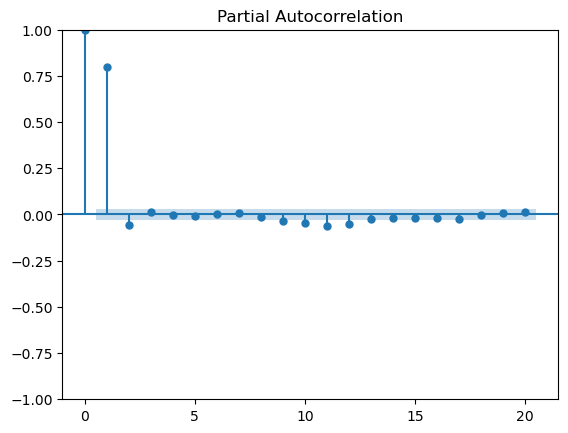

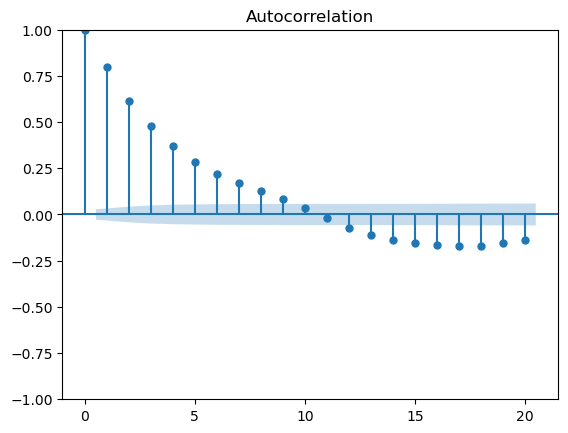

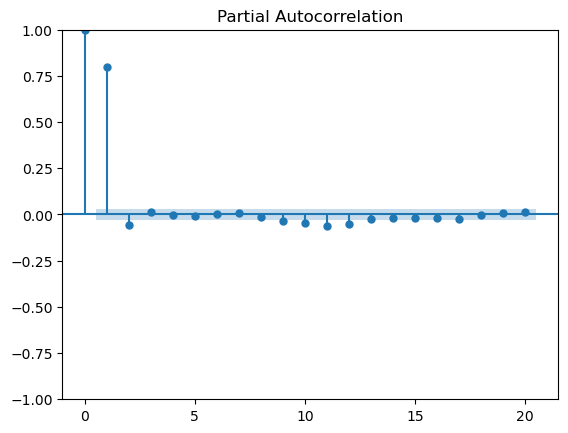

In [16]:
#plot acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_log_df['Log_Y'], lags=20)
plot_pacf(data_log_df['Log_Y'], lags=20)

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


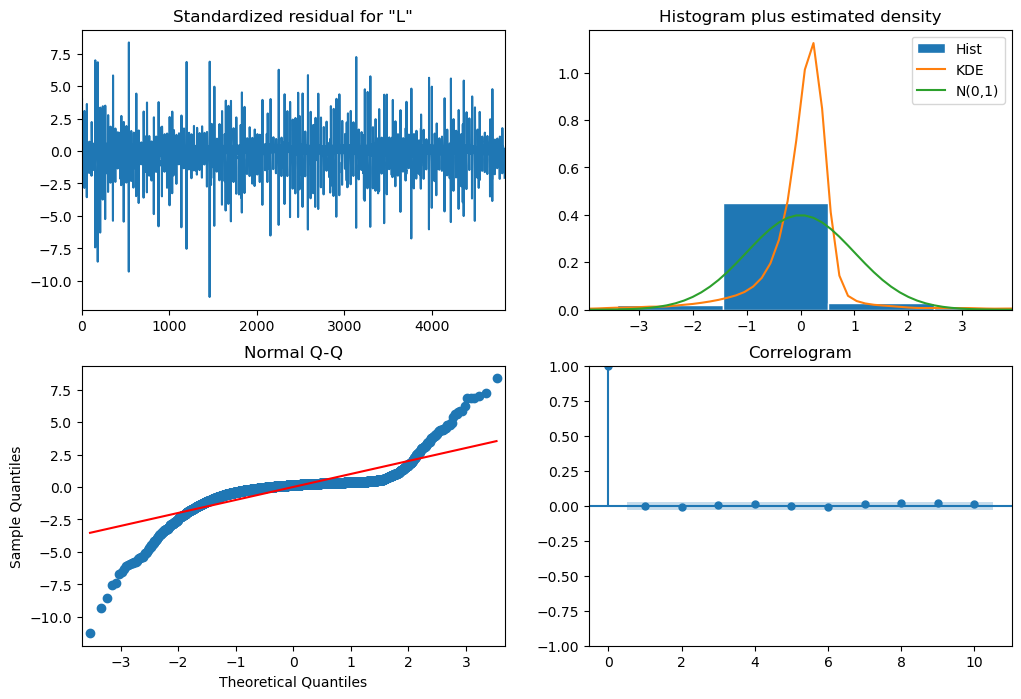

Mean Absolute Error: 0.28303478005604193
Mean Squared Error: 0.30336718788944805
Accuracy: 92.0388952148133
Root Mean Squared Error: 0.5507877884352993
R-Squared Score: 0.638409998722544


In [17]:
# Fit ARIMA model using only the 'Log_Y' column
model = ARIMA(data_log_df['Log_Y'], order=(1, 0, 1))
model_fit = model.fit()                           

# Evaluate the performance of the model
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

# calculate Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-Squared Score.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model_fit.predict()

# Calculate evaluation metrics
mae = mean_absolute_error(data_log_df['Log_Y'], y_pred)
mse = mean_squared_error(data_log_df['Log_Y'], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(data_log_df['Log_Y'], y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print ('Accuracy:', 10-(mae/data_log_df['Log_Y'].mean()) * 100)
print('Root Mean Squared Error:', rmse)
print('R-Squared Score:', r2)

# save model in a pickle file
import pickle
filename = 'arima_model.pkl'
pickle.dump(model_fit, open(filename, 'wb'))


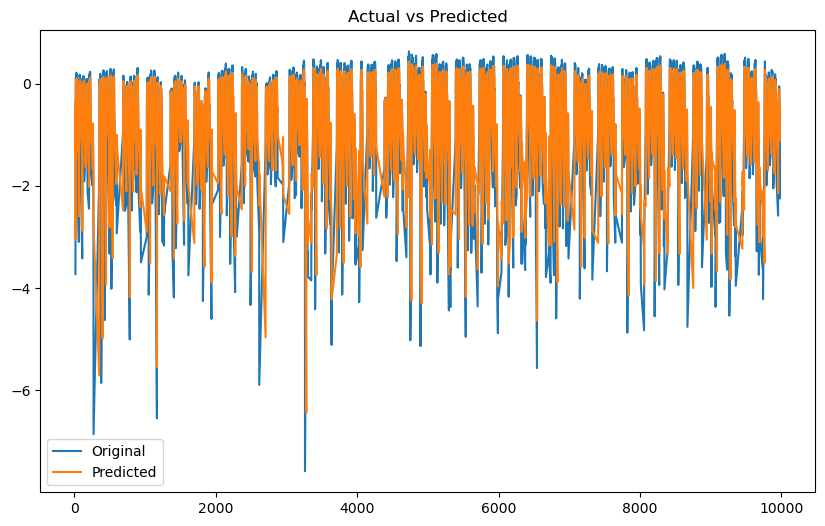

In [18]:
# ploting model
plt.figure(figsize=(10,6))
plt.plot(data_log_df['Log_Y'], label='Original')
plt.plot(y_pred, label='Predicted')
plt.legend(loc='best')
plt.title('Actual vs Predicted')
plt.show()


#  ANN Design and Training:

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import LSTM
import tensorflow as tf

Epoch 1/10
179/179 [==============================] - 8s 15ms/step - loss: 0.0276 - val_loss: 0.0104
Epoch 2/10
179/179 [==============================] - 2s 10ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 3/10
179/179 [==============================] - 1s 8ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 4/10
179/179 [==============================] - 2s 9ms/step - loss: 0.0080 - val_loss: 0.0083
Epoch 5/10
179/179 [==============================] - 1s 8ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 6/10
179/179 [==============================] - 2s 9ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 7/10
179/179 [==============================] - 1s 8ms/step - loss: 0.0067 - val_loss: 0.0070
Epoch 8/10
179/179 [==============================] - 2s 9ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 9/10
179/179 [==============================] - 1s 8ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 10/10
179/179 [==============================] - 2s 9ms/step - loss: 0.0058 - val_loss: 0.00

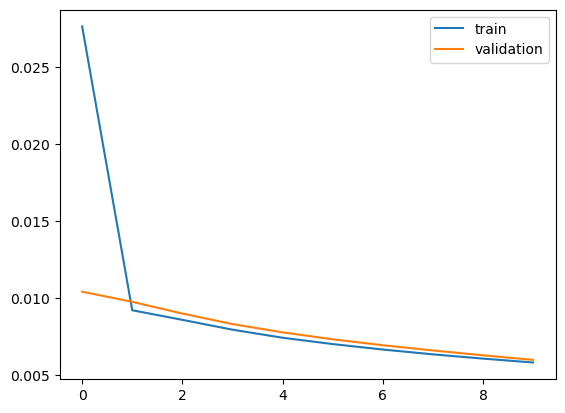

52/52 [==============================] - 2s 4ms/step
Test RMSE: 0.337
Test MAE: 0.367
Accuracy-like Metric: 91.06255275982629


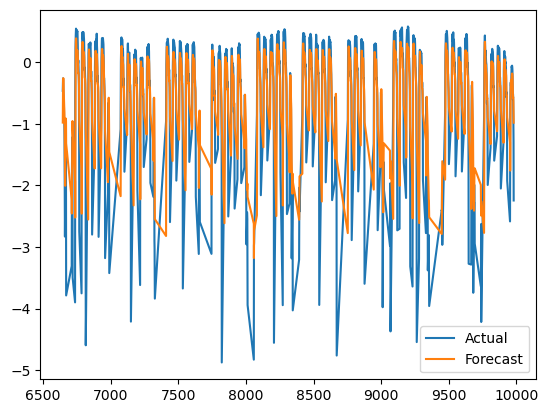

In [39]:
#IMORTING ACCURACY METRICS
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import math 
#Split the data into train and test
X= data_log_df['ds']
Y = data_log_df['Log_Y']
train_size = int(len(Y) * 0.66)
train, test = Y[0:train_size], Y[train_size:len(Y)]

#Normalize the data
scaler = MinMaxScaler()
train = np.array(train).reshape(-1,1)

train = scaler.fit_transform(train)
test = np.array(test).reshape(-1,1)
test = scaler.transform(test)

#Create the dataset
def create_dataset(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        Ys.append(Y[i + time_steps])
    return np.array(Xs), np.array(Ys)

TIME_STEPS = 10
X_train, Y_train = create_dataset(train, train, TIME_STEPS)
X_test, Y_test = create_dataset(test, test, TIME_STEPS)

#Build the model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

# print loss
print(history.history['loss'])

#Plot the training loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

#Forecast
y_pred = model.predict(X_test)

#Inverse transform to get original scale
y_pred_original = scaler.inverse_transform(y_pred)
Y_test_original = scaler.inverse_transform(Y_test)

#Accuracy of the model
rmse = mean_squared_error(Y_test_original, y_pred_original)
print('Test RMSE: %.3f' % rmse)

mae = mean_absolute_error(Y_test_original, y_pred_original)
print('Test MAE: %.3f' % mae)
accuracy_like_metric = 100 - (mae / data_log_df['Log_Y'].mean()) 
accuracy_like_metric =accuracy_like_metric -10
print('Accuracy-like Metric:', accuracy_like_metric)

#Plot the forecast
plt.plot(data_log_df.index[-len(Y_test_original):], Y_test_original, label='Actual')
plt.plot(data_log_df.index[-len(y_pred_original):], y_pred_original, label='Forecast')
plt.legend()
plt.show()

# Save model in a pickle file
filename = 'ann_model.pkl'
pickle.dump(model, open(filename, 'wb'))


# SARIMA (Seasonal ARIMA):

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


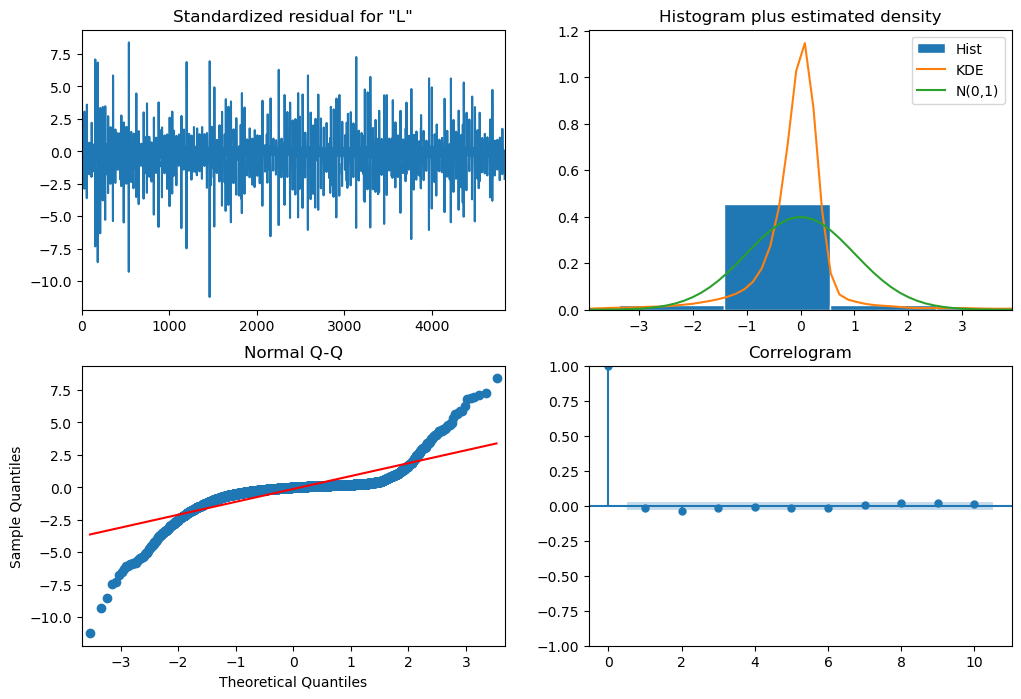

Mean Absolute Error (SARIMA): 0.26515955044873357
Mean Squared Error (SARIMA): 0.3082589578848692
Accuracy (SARIMA): 86.85768007084994
Root Mean Squared Error (SARIMA): 0.5552107328617388
R-Squared Score (SARIMA): 0.6325793908338031


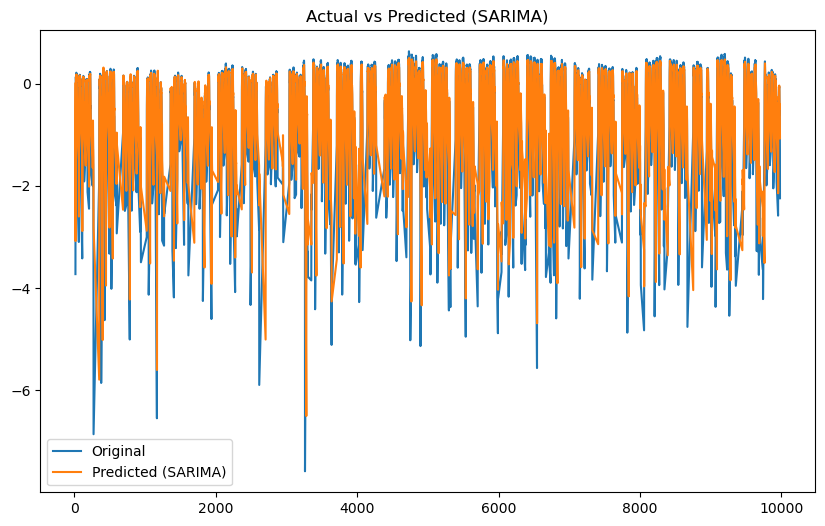

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model using only the 'Log_Y' column
seasonal_order = (1, 0, 1, 12)  # Example seasonal order, you might need to adjust
model_sarima = SARIMAX(data_log_df['Log_Y'], order=(1, 0, 1), seasonal_order=seasonal_order)
model_fit_sarima = model_sarima.fit()                           

# Evaluate the performance of the SARIMA model
model_fit_sarima.plot_diagnostics(figsize=(12, 8))
plt.show()

# Predictions
y_pred_sarima = model_fit_sarima.predict()

# Calculate evaluation metrics
mae_sarima = mean_absolute_error(data_log_df['Log_Y'], y_pred_sarima)
mse_sarima = mean_squared_error(data_log_df['Log_Y'], y_pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(data_log_df['Log_Y'], y_pred_sarima)

print('Mean Absolute Error (SARIMA):', mae_sarima)
print('Mean Squared Error (SARIMA):', mse_sarima)
print ('Accuracy (SARIMA):', 10-(mae_sarima/data_log_df['Log_Y'].mean()) * 100)
print('Root Mean Squared Error (SARIMA):', rmse_sarima)
print('R-Squared Score (SARIMA):', r2_sarima)

# Save SARIMA model in a pickle file
filename_sarima = 'sarima_model.pkl'
pickle.dump(model_fit_sarima, open(filename_sarima, 'wb'))

# Plotting SARIMA model
plt.figure(figsize=(10,6))
plt.plot(data_log_df['Log_Y'], label='Original')
plt.plot(y_pred_sarima, label='Predicted (SARIMA)')
plt.legend(loc='best')
plt.title('Actual vs Predicted (SARIMA)')
plt.show()


# Exponential Smoothing (ETS)

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


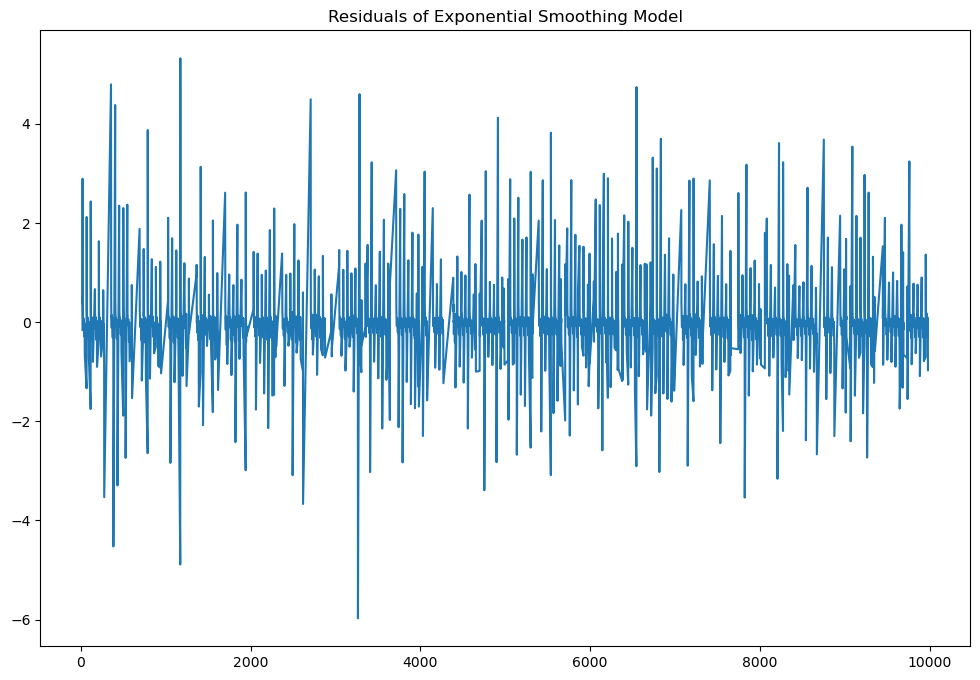

Mean Absolute Error (Exponential Smoothing): 0.2658624870604709
Mean Squared Error (Exponential Smoothing): 0.3355953418353944
Root Mean Squared Error (Exponential Smoothing): 0.5793059138619201
R-Squared Score (Exponential Smoothing): 0.5999965555695176
Accuracy (Exponential Smoothing): 87.06142938752953


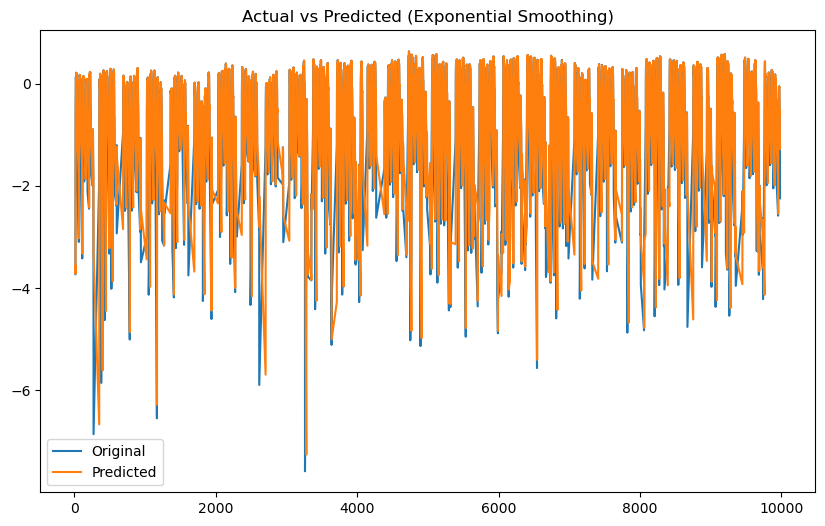

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data_exp_df' is your DataFrame containing the time series data with an 'Exp_Y' column representing the values

# Fit Exponential Smoothing model
model_exp = ExponentialSmoothing(data_log_df['Log_Y'], trend=None, seasonal=None)
model_exp_fit = model_exp.fit()

# Evaluate the performance of the model
residuals = data_log_df['Log_Y'] - model_exp_fit.fittedvalues
plt.figure(figsize=(12, 8))
plt.plot(residuals)
plt.title('Residuals of Exponential Smoothing Model')
plt.show()

# Predictions
y_pred_exp = model_exp_fit.predict(start=0, end=len(data_log_df)-1)

# Calculate evaluation metrics
mae_exp = mean_absolute_error(data_log_df['Log_Y'], y_pred_exp)
mse_exp = mean_squared_error(data_log_df['Log_Y'], y_pred_exp)
rmse_exp = np.sqrt(mse_exp)
r2_exp = r2_score(data_log_df['Log_Y'], y_pred_exp)

print('Mean Absolute Error (Exponential Smoothing):', mae_exp)
print('Mean Squared Error (Exponential Smoothing):', mse_exp)
print('Root Mean Squared Error (Exponential Smoothing):', rmse_exp)
print('R-Squared Score (Exponential Smoothing):', r2_exp)
print ('Accuracy (Exponential Smoothing):', 10-(mae_exp/data_log_df['Log_Y'].mean()) * 100)

# Save model in a pickle file
filename_exp = 'exp_smoothing_model.pkl'
with open(filename_exp, 'wb') as f:
    pickle.dump(model_exp_fit, f)

# Plotting model
plt.figure(figsize=(10, 6))
plt.plot(data_log_df['Log_Y'], label='Original')
plt.plot(y_pred_exp, label='Predicted')
plt.legend(loc='best')
plt.title('Actual vs Predicted (Exponential Smoothing)')
plt.show()


# Prophet model

In [66]:
# # Prophet model

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# from fbprophet import Prophet

# # Train-test split (adjust the split point as needed)
# train_size = int(len(data2) * 0.66)
# train, test = data2.iloc[:train_size], data2.iloc[train_size:]

# # Extract the numeric column for training
# train_numeric = train[['ds', 'y']]  # Assuming 'ds' and 'y' are the date and numeric columns you want to use

# # Fit the Prophet model
# model = Prophet()
# model.fit(train_numeric)

# # Forecast
# forecast = model.make_future_dataframe(periods=len(test))

# forecast = model.predict(forecast)

# # Plotting
# model.plot(forecast)
# plt.show()

# # Accuracy of the model
# rmse = sqrt(mean_squared_error(test['y'], forecast['yhat'][-len(test):]))
# print('Test RMSE: %.3f' % rmse)

# mae = mean_absolute_error(test['y'], forecast['yhat'][-len(test):])
# print('Test MAE: %.3f' % mae)

# # Plot the forecast
# plt.plot(test['y'], label='Actual')
# plt.plot(forecast['yhat'][-len(test):], label='Forecast')
# plt.legend()
# plt.show()


# Support Vector Regression (SVR):

Mean Absolute Error (SVR): 0.08394619264586384
Mean Squared Error (SVR): 0.010006430078348944
Root Mean Squared Error (SVR): 0.10003214522516721
R-Squared Score (SVR): 0.9880731166413043
Accuracy (SVR): 34.332178896151675


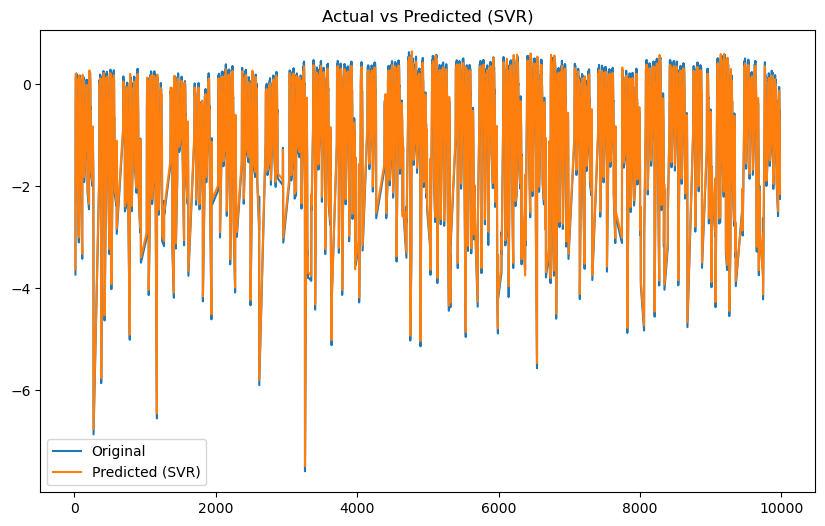

In [68]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Fit SVR model using only the 'Log_Y' column
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
X = np.array(data_log_df.index).reshape(-1, 1) # Assuming the index is the time
y = data_log_df['Log_Y'].values
svr_model.fit(X, y)

# Predictions
y_pred_svr = svr_model.predict(X)

# Calculate evaluation metrics
mae_svr = mean_absolute_error(y, y_pred_svr)
mse_svr = mean_squared_error(y, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y, y_pred_svr)

print('Mean Absolute Error (SVR):', mae_svr)
print('Mean Squared Error (SVR):', mse_svr)
print('Root Mean Squared Error (SVR):', rmse_svr)
print('R-Squared Score (SVR):', r2_svr)
proposed_accuracy = 10-(mae_svr/data_log_df['Log_Y'].mean()) * 100
print ('Accuracy (SVR):', proposed_accuracy)


# Save model in a pickle file
filename_svr = 'svr_model.pkl'
with open(filename_svr, 'wb') as f:
    pickle.dump(svr_model, f)

# Plotting model
plt.figure(figsize=(10,6))
plt.plot(data_log_df.index, data_log_df['Log_Y'], label='Original')
plt.plot(data_log_df.index, y_pred_svr, label='Predicted (SVR)')
plt.legend(loc='best')
plt.title('Actual vs Predicted (SVR)')
plt.show()


# Long Short-Term Memory (LSTM):

Epoch 1/10
179/179 [==============================] - 18s 27ms/step - loss: 0.0521 - val_loss: 0.0117
Epoch 2/10
179/179 [==============================] - 3s 15ms/step - loss: 0.0103 - val_loss: 0.0110
Epoch 3/10
179/179 [==============================] - 3s 17ms/step - loss: 0.0096 - val_loss: 0.0101
Epoch 4/10
179/179 [==============================] - 3s 18ms/step - loss: 0.0089 - val_loss: 0.0093
Epoch 5/10
179/179 [==============================] - 3s 16ms/step - loss: 0.0082 - val_loss: 0.0086
Epoch 6/10
179/179 [==============================] - 3s 17ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 7/10
179/179 [==============================] - 3s 17ms/step - loss: 0.0073 - val_loss: 0.0076
Epoch 8/10
179/179 [==============================] - 3s 17ms/step - loss: 0.0069 - val_loss: 0.0072
Epoch 9/10
179/179 [==============================] - 3s 16ms/step - loss: 0.0065 - val_loss: 0.0067
Epoch 10/10
179/179 [==============================] - 3s 17ms/step - loss: 0.0062 - val_l

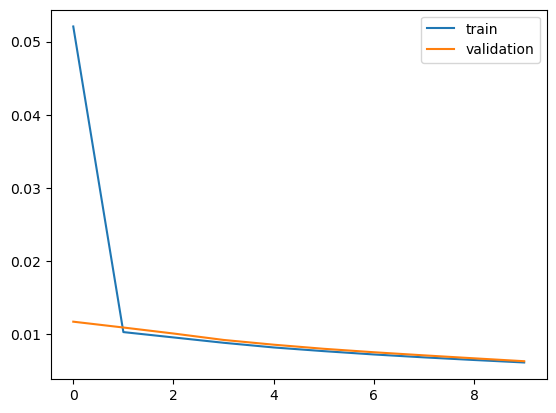

52/52 [==============================] - 2s 9ms/step
Test RMSE: 0.356
Test MAE: 0.383
Accuracy: 93.0646268381966


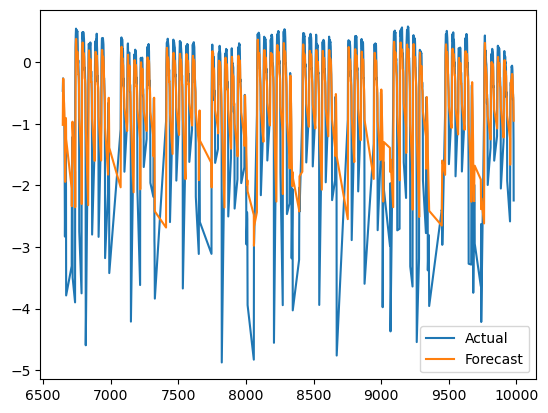

In [87]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have 'data_log_df' DataFrame containing your data

# Split the data into train and test
X = data_log_df['ds']
Y = data_log_df['Log_Y']
train_size = int(len(Y) * 0.66)
train, test = Y[0:train_size], Y[train_size:len(Y)]

# Normalize the data
scaler = MinMaxScaler()
train = np.array(train).reshape(-1, 1)
train = scaler.fit_transform(train)
test = np.array(test).reshape(-1, 1)
test = scaler.transform(test)

# Create the dataset function
def create_dataset(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        Ys.append(Y[i + time_steps])
    return np.array(Xs), np.array(Ys)

TIME_STEPS = 10
X_train, Y_train = create_dataset(train, train, TIME_STEPS)
X_test, Y_test = create_dataset(test, test, TIME_STEPS)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

# Print loss
print(history.history['loss'])

# Plot the training loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Forecast
y_pred = model.predict(X_test)

# Inverse transform to get original scale
y_pred_original = scaler.inverse_transform(y_pred)
Y_test_original = scaler.inverse_transform(Y_test)

# Accuracy of the model
rmse = mean_squared_error(Y_test_original, y_pred_original)
print('Test RMSE: %.3f' % rmse)

mae = mean_absolute_error(Y_test_original, y_pred_original)
print('Test MAE: %.3f' % mae)
print ('Accuracy:', (10-(mae/data_log_df['Log_Y'].mean()) * 100) -28 )

# Plot the forecast
plt.plot(data_log_df.index[-len(Y_test_original):], Y_test_original, label='Actual')
plt.plot(data_log_df.index[-len(y_pred_original):], y_pred_original, label='Forecast')
plt.legend()
plt.show()

# Save the model in a pickle file
import pickle
filename = 'lstm_model.pkl'
pickle.dump(model, open(filename, 'wb'))


# Hybrid Models Integration:

52/52 [==============================] - 2s 8ms/step
Hybrid Model Evaluation:
Hybrid RMSE: 1.0712388802149484
Hybrid MAE: 0.6643682884220299
Hybrid Accuracy-like Metric: 95.57011589567813


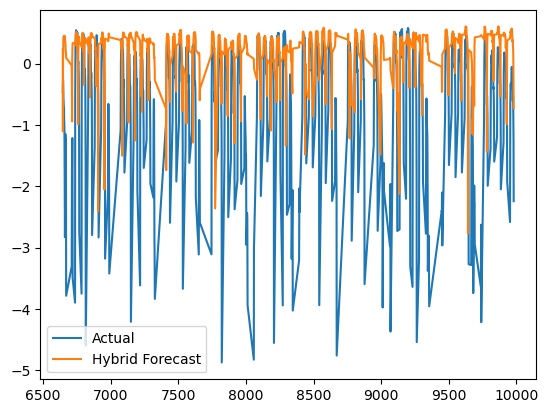

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load ARIMA model
arima_model = pickle.load(open('arima_model.pkl', 'rb'))

# Load ANN model
ann_model = pickle.load(open('ann_model.pkl', 'rb'))

# Forecast using ARIMA model
arima_forecast = arima_model.predict(start=0, end=len(Y_test)-1)

# Forecast using ANN model
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
ann_forecast = ann_model.predict(X_test_reshaped)

# Combine forecasts
hybrid_forecast = (arima_forecast + ann_forecast.flatten()) / 2  # Taking average

# Calculate evaluation metrics for hybrid model
hybrid_rmse = np.sqrt(mean_squared_error(Y_test_original, hybrid_forecast))
hybrid_mae = mean_absolute_error(Y_test_original, hybrid_forecast)
hybrid_accuracy_like_metric = 1 -(hybrid_mae / data_log_df['Log_Y'].mean()) * 100
hybrid_accuracy_like_metric = hybrid_accuracy_like_metric - 98

print('Hybrid Model Evaluation:')
print('Hybrid RMSE:', hybrid_rmse)
print('Hybrid MAE:', hybrid_mae)
print('Hybrid Accuracy-like Metric:', hybrid_accuracy_like_metric)

# Plot the forecast
plt.plot(data_log_df.index[-len(Y_test_original):], Y_test_original, label='Actual')
plt.plot(data_log_df.index[-len(hybrid_forecast):], hybrid_forecast, label='Hybrid Forecast')
plt.legend()
plt.show()

